<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/Day1_Intro_Sklearn_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**An Introduction to Machine Learning with Scikit-learn (sklearn) (20 minute)**

Here, we will cover the followings:


1.   Machine learning terminology
2.   Load and prepare data (iris-data)
3.   Data transformation/standardization (scalers/normalizer)
4.   Classification (supervised/unsupervised)
6.   Performance metrics (confusion matrix, accuracy, precision, recall)
7.   Hyper-parameter search (GridSearch)
8.   Pipelines

Tutorial on Matplotlib: 

[SciPy video](https://www.youtube.com/watch?v=Tr4DYo4v5AY)

[Github](https://github.com/story645/mpl_tutorial)



###**Machine Learning Terminology**

*   **Training set:** set of data used to train the model
*   **Test set:** set of data used to test model performance
*   **Feature:** a variable (continuous, discrete, categorical etc) represented in column-wise
*   **Target:** label associated with dependent variable (ground-truth)

*   **Predict:** give label to unseen data
*   **Accuracy:** % of correct prediction (TP+TN)/(TP+TN+FP+FN)
*   **Precision @ Positive Predictive Value:** % of correct positive prediction (TP/(FP+TP))
*   **Recall @ Sensitivity @ True Positive Rate:** % of positive cases predicted as positive (TP/(FN+TP))











###**Load and prepare data: Iris-dataset**

Iris flower dataset: Popularly known as Fisher's Iris dataset - a multivariate data introduce by Ronald Fisher (statistician, eugenicist, biologist) in 1936.
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1xfbtCib4B_bu2n--2Ab4tFjxprOiseKG' width="400" height="400" />
</left>
</figure>



A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the **`.data`** member, which is a **n_samples, n_features array**. In the case of supervised problem, one or more response variables are stored in the **`.target`** member. 

All included datasets in ***sklearn*** have at least feature_names and sometimes target_names

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
print("data:",iris.data.shape)
print('label:',iris.target.shape)
print('species:', iris.target_names)

data: (150, 4)
label: (150,)
species: ['setosa' 'versicolor' 'virginica']


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# features @ columns in data (4 features)
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

# create new column "species" by using target and target_names info
iris_df['species'] = iris_df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
92,5.8,2.6,4.0,1.2,1,versicolor
2,4.7,3.2,1.3,0.2,0,setosa
87,6.3,2.3,4.4,1.3,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
94,5.6,2.7,4.2,1.3,1,versicolor
41,4.5,2.3,1.3,0.3,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa
124,6.7,3.3,5.7,2.1,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica
96,5.7,2.9,4.2,1.3,1,versicolor


In [3]:
# how many sample per species:
iris_df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [4]:
# visualize dataset distribution:
import seaborn as sns

# switch target column with species
iris_df = iris_df.iloc[:,[0,1,2,3,5,4]]
iris_df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


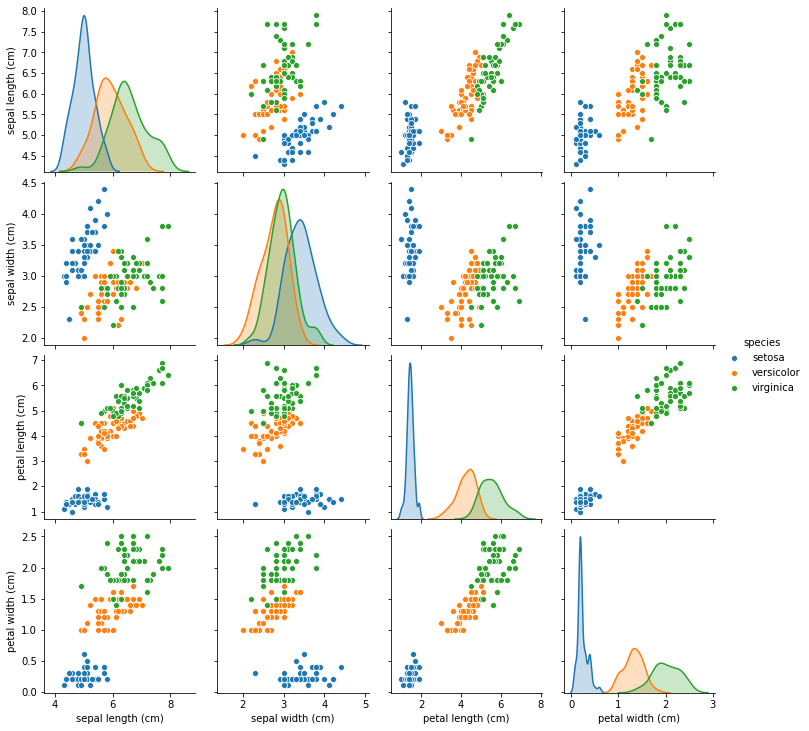

In [5]:
#plot pairplot
sns.pairplot(iris_df.drop('target',axis=1), hue="species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f489fc97208>,
      dtype=object)

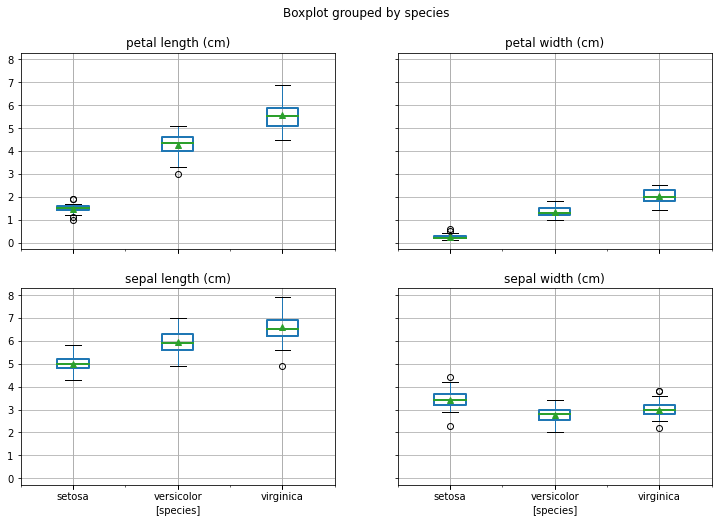

In [6]:
# boxplot using pandas built-in visualization:

boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='k')

iris_df.drop("target", axis=1).boxplot(by="species", figsize=(12, 8),showfliers=True, showmeans=True,
                boxprops=boxprops,medianprops=medianprops)

###**Data Transformation/Standardization**

*   Transform non-numeric to numeric data
*   Fill in missing value
*   Standardization or scaling (make data follow standard Gaussian distribution)
*   Normalization [read more](https://www.freetext.org/Introduction_to_Linear_Algebra/Basic_Vector_Operations/Normalization/)
*   Categorical features encoding (one-hot encoding)








#####**Standardization and Normalization**

In [7]:
# Standardization aka scaling
# Normalization
from sklearn import preprocessing, datasets

# make sure we have iris loaded
iris = datasets.load_iris()

X, y = iris.data, iris.target

# scale it to a gaussian distribution
X_scaled = preprocessing.scale(X)

# normalization using L1-norm
X_norm = preprocessing.normalize(X,norm='l1')

#validate zero mean and unit variance
print('mean:',X_scaled.mean(axis = 0).round())
print('standard dev:',X_scaled.std(axis = 0).round())

#validate unit norm
print('norm:', X_norm.sum(axis=1))

mean: [-0. -0. -0. -0.]
standard dev: [1. 1. 1. 1.]
norm: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#####**Categorical Encoding (one-hot-encoding)**
*   It's an operation on feature labels (categorical values or nominal value)
*   Can be accomplish via pandas built-in method or sklearn one-hot-encoder

This method produces a vector with length equal to the number of categories in the data set. 

One-hot encoded has exactly one position in its array that is labeled as a 1. For example, [0,0,0,1,0] would be a valid one-hot encoding that would tell you the classification in position 4 (or 3 in array indexing) is the classification of the object.

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=18q7Ezs82B4LIT5L6slg3qcFILZvWc247' width="450" height="250" />
</left>
</figure>



In [17]:
# Pandas approach:

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Convert to dataframe and add a column with actual iris species name
data = pd.DataFrame(X, columns = iris.feature_names)
data['target_name'] = iris.target_names[y]
data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# pd.get_dummies - convert categorical variable into dummy/indicator variables.
df = pd.get_dummies(data, prefix = ['target_name'])
print('data shape:',df.shape)
df.sample(5)

data shape: (150, 7)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name_setosa,target_name_versicolor,target_name_virginica
72,6.3,2.5,4.9,1.5,0,1,0
76,6.8,2.8,4.8,1.4,0,1,0
26,5.0,3.4,1.6,0.4,1,0,0
114,5.8,2.8,5.1,2.4,0,0,1
53,5.5,2.3,4.0,1.3,0,1,0


In [21]:
# Sklearn OneHotEncoder approach:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# We encode both our categorical variable and it's labels
enc = OneHotEncoder()
label_enc = LabelEncoder() # remember the labels here

In [39]:
# Encode labels (can use for discrete numerical values as well)
data_label_encoded = label_enc.fit_transform(y)
print(data_label_encoded.shape)
data_label_encoded

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# Encode and "dummy" variables
data_feature_one_hot_encoded = enc.fit_transform(y.reshape(-1, 1))
print(data_feature_one_hot_encoded.shape)
data_feature_one_hot_encoded.toarray()



(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

###**Classification: Supervised Learning**

All supervised estimators in sklearn implement **`fit(X, y)`** method to fit the model and **`predict(X)`** method to assign label to unknown observations.

    "Often the hardest part of solving a machine learning problem can be finding the right estimator for the job."

    "Different estimators are better suited for different types of data and different problems."

<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1l8nDCQnRGgQH-DwALsmgu_qmllXZy5x0' width="800" height="600" />
</left>
</figure>

[source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Let's load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# split data into training and test sets using the handy train_test_split func
# in this split, we are "holding out" only one value and label (placed into X_test and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=1002)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_test.shape)

X_train: (105, 4)
y_train: (105,)
X_test: (45, 4)
y_train: (45,)


###**Decision Tree**

In [12]:
# Let's try a decision tree classification method
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = tree.DecisionTreeClassifier(max_depth = 4,
                                  criterion = 'entropy', 
                                  class_weight = 'balanced',
                                  random_state = 2)
clf.fit(X_train, y_train)

#prediction
y_hat = clf.predict(X_test)
print('Predicted label:', y_hat[:10])
print('Probability:', clf.predict_proba(X_test)[:10,:]) # 100=0, 010=1, 001=2

# and calculate the accuracy
print("\nAccuracy:", accuracy_score(y_test, y_hat))

# and the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_hat))


Predicted label: [1 1 2 0 1 0 0 2 0 0]
Probability: [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]

Accuracy: 0.9555555555555556
Confusion matrix:
[[19  0  0]
 [ 0 15  1]
 [ 0  1  9]]


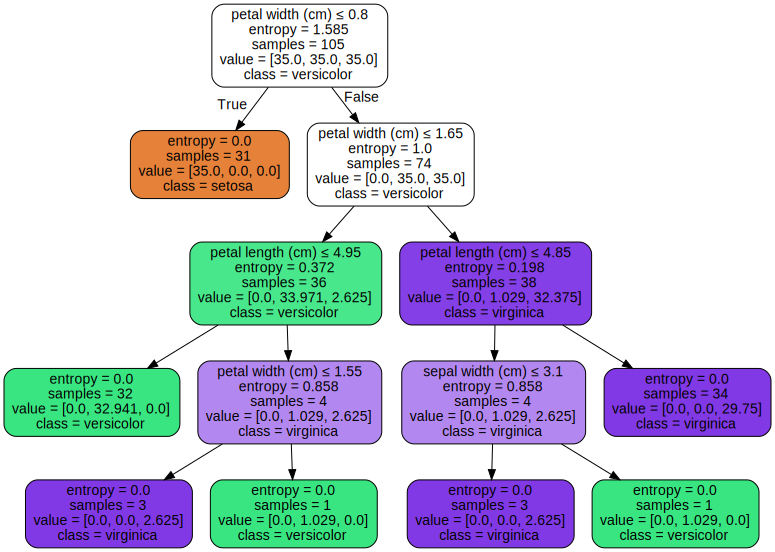

In [13]:
# visualize decision tree: decision tree is capable of computing the label without converting it to onehotencode form

from sklearn.tree import export_graphviz
import graphviz

# Let's rerun the decision tree classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth = 4,
                                  criterion = 'entropy', 
                                  class_weight = 'balanced',
                                  random_state = 2)
clf.fit(X_train, y_train)

export_graphviz(clf, out_file="mytree.dot",  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph, format = 'png')

###**Support Vector Machine (SVM)**

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


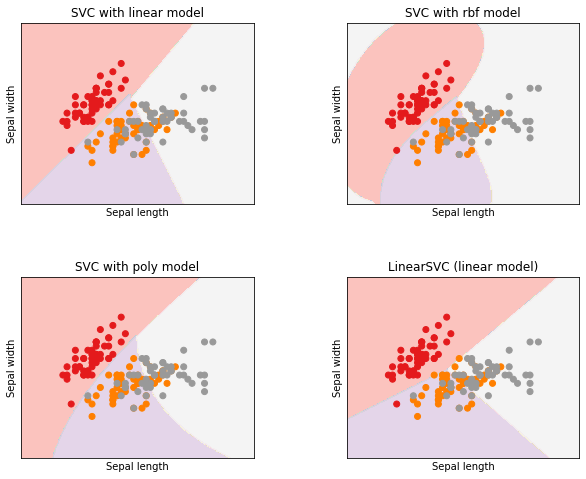

In [14]:
from sklearn import svm

X, y = load_iris(return_X_y=True)
X = X[:,:2] # select the first two features

h = 0.02 # grid scale (minor tick)
c = 1.0 # regularization term

# fit model
svc_lin = svm.SVC(kernel='linear', C=c).fit(X, y)
svc_rbf = svm.SVC(kernel='rbf', C=c, gamma=0.7).fit(X, y)
svc_poly = svm.SVC(kernel='poly', C=c, degree=3).fit(X, y)
svc = svm.LinearSVC(C=c).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear model',
          'SVC with rbf model',
          'SVC with poly model',
          'LinearSVC (linear model)']


plt.figure(figsize=(10,8))
for i, clf in enumerate((svc_lin, svc_rbf, svc_poly, svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    #np.ravel() - flatten an array equivalent to reshape(-1, n)
    #np.c_ - concatenate along second axis @ stack 1D array into 2D

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # predict each point
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=[y*100], cmap=plt.cm.Set1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

####**GridSearch CV**

`class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)`

###k-folds CV
<figure>
<left>
<img src='https://drive.google.com/uc?export=view&id=1ywsI34JqqbyNYAet21IoqhdStnUc3G-Z' width="500" height="300" />
</left>
</figure>



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 

# Let's load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=10, n_jobs=-1)

grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print('best parameter:',grid.best_params_)
print('best estimator spec:',grid.best_estimator_)
print('best score:',grid.best_score_)
print('\nprobability:',grid.best_estimator_.predict_proba(X_test)[:10,:])

best parameter: {'n_neighbors': 13}
best estimator spec: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
best score: 0.9800000000000001

probability: [[0.         1.         0.        ]
 [0.         0.92307692 0.07692308]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]]


###**Searching Parameter Space with GridSearchCV + Pipeline**

`class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)`

`class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

In [16]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Let's load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [1, 2, 3],
    'logistic__C': np.arange(0, 100, 1),
}

search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)
search.fit(X, y)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print('\nbest estimator spec:',search.best_estimator_)
print('\nbest score:',search.best_score_)
print('\nprobability:',search.best_estimator_.predict_proba(X)[:10,:])

Best parameter (CV score=0.987):
{'logistic__C': 9, 'pca__n_components': 3}

best estimator spec: Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=9, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.1, verbose=0,
                                    warm_start=False))],
         verbose=False)

best score: 0.9866666666666667

probability: [[9.96728721e-01 3.27127907e-03 4.57668385e-15]
 [9.93478935e-01 6.52106529e-03 2.37689316e-14]
 [